/home/liquanyi/anaconda3/envs/metadrive/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


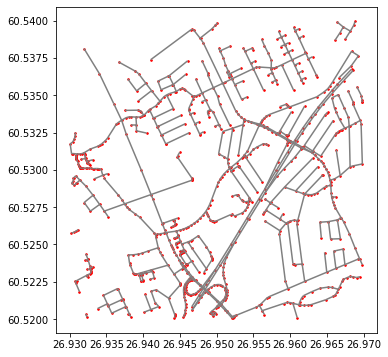

In [1]:
from pyrosm import OSM, get_data

# Initialize reader
osm = OSM(get_data("test_pbf"))

# Read nodes and edges of the 'driving' network
nodes, edges = osm.get_network(nodes=True, network_type="driving")

# Plot nodes and edges on a map

ax = edges.plot(figsize=(6,6), color="gray")
ax = nodes.plot(ax=ax, color="red", markersize=2.5)

In [27]:
edges.head(1)["v"]

0    2316826913
Name: v, dtype: int64

In [26]:
nodes.head(2)

,lon,lat,tags,timestamp,version,changeset,id,geometry
0,26.943103,60.525798,None,1369300078,4,0,36156596,POINT (26.94310 60.52580)
1,26.942948,60.525962,{'highway': 'crossing'},1369300072,1,0,2316826913,POINT (26.94295 60.52596)


In [2]:
# Export the nodes and edges to NetworkX graph
G = osm.to_graph(nodes, edges, graph_type="networkx")
G

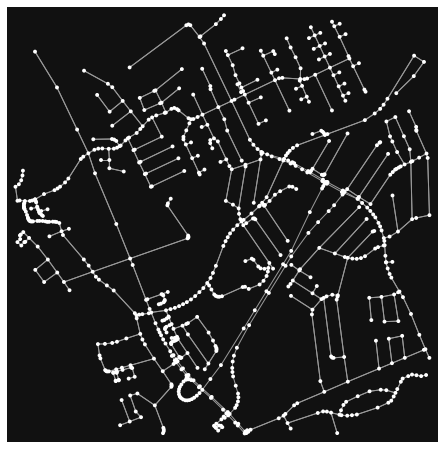

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
import osmnx as ox
ox.plot_graph(G)

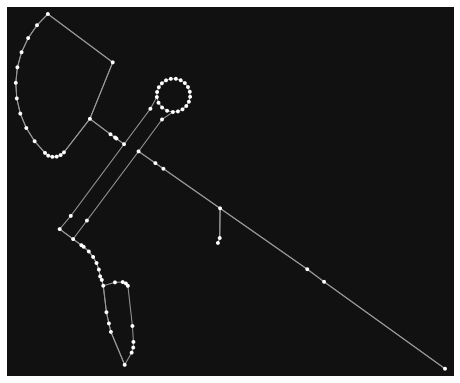

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [193]:
from pyrosm import OSM, get_data
import osmnx as ox
import pandas as pd

# Initialize the reader
osm = OSM("cpii.osm.pbf")

# Get all walkable roads and the nodes 
nodes, edges = osm.get_network(nodes=True, network_type="driving")
draw = result = pd.concat([edges[edges["lanes"].isna()], edges[edges["lanes"]=="2"]])
total_G = osm.to_graph(nodes, draw, graph_type="networkx")
# print(total_G.edges.data())
for e in list(total_G.edges.data()):
    assert e[2]["lanes"] is None or isinstance(e[2]["lanes"], str)
        
    
ox.plot_graph(total_G)

In [167]:
edges["lanes"].unique()

array(['2', None, '1'], dtype=object)

In [141]:
edges.keys()

Index(['access', 'highway', 'lanes', 'name', 'oneway', 'id', 'timestamp',
       'version', 'tags', 'osm_type', 'geometry', 'u', 'v', 'length'],
      dtype='object')

In [142]:
nodes.tags

0                         None
1                         None
2                         None
3                         None
4                         None
                ...           
109                       None
110                       None
111                       None
112                       None
113    {'highway': 'crossing'}
Name: tags, Length: 114, dtype: object

In [46]:
nodes.head()["geometry"]
# nodes.head()["tags"]
# nodes.head()["changeset"]

0    POINT (114.20908 22.42914)
1    POINT (114.20905 22.42918)
2    POINT (114.20903 22.42922)
3    POINT (114.20904 22.42926)
4    POINT (114.20905 22.42930)
Name: geometry, dtype: geometry

/home/liquanyi/anaconda3/envs/metadrive/lib/python3.7/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/home/liquanyi/anaconda3/envs/metadrive/lib/python3.7/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


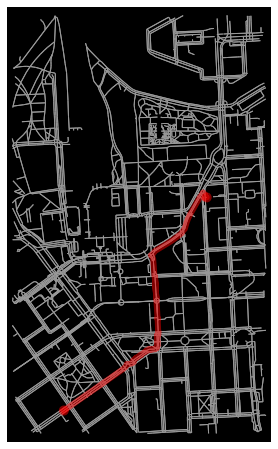

In [9]:
source_address = "Bulevardi 5, Helsinki"
target_address = "Unioninkatu 40, Helsinki"

source = ox.geocode(source_address)
target = ox.geocode(target_address)

# Find the closest nodes from the graph
source_node = ox.get_nearest_node(G, source)
target_node = ox.get_nearest_node(G, target)

# Find shortest path (by distance)
import networkx as nx
route = nx.shortest_path(G, source_node, target_node, weight="length")
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')